# Lecture 12: Introduction to Keras

![](https://www.tensorflow.org/images/colab_logo_32px.png)
[Run in colab](https://colab.research.google.com/drive/1UX-aQOoLzt8q1gcGp8FQ3mM1L2qDNMA-)

In [1]:
import datetime
now = datetime.datetime.now()
print("Last executed: " + now.strftime("%Y-%m-%d %H:%M:%S"))

Last executed: 2021-02-12 12:35:52


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os

## Overview of Keras

Kera is a high-level API for deep learing.

It supports multiple back end deep learning frameworks.  

While Keras could be used with TensorFlow 1.0, as of TensorFlow 2.0 it is tightly integrated.

<br>

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture12_Images/keras_architecture.png" style="height: 300px;"/>

[Credit: Geron]

Keras's API is simlar to Facebook's [PyTorch](https://pytorch.org/) library (PyTorch and TensorFlow are the two most popular deep learning libraries).  Both are very similar to the Scikit Learn API.  So learning Keras will be useful if you want to transition to PyTorch.

Plus, Keras considerably simplifies the use of TensorFlow!

## Sequential API

Keras supports a number of different APIs.

We'll start by considering the *Sequential API*, which is the simplest and simply considers a stack of layers connected sequentially.

### Loading data

We'll using the fashion MNIST dataset to illustrate the use of Keras.

Keras includes support to load a number of popular datasets in `keras.datasets`.

Let's use Keras to load fashion MNIST (note that the dataset already includes standard training and test sets).

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


The training set contains 60,000 grayscale images, each 28x28 pixels (similar to the MNIST digit dataset):

In [4]:
X_train_full.shape

(60000, 28, 28)

Since no validation set is provided, we'll split the full training set into a validation set and a (smaller) training set.

Let's split the full training set into a validation set and a (smaller) training set (also also scale the pixel intensities from 0-255 to 0-1). 

In [5]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

Plot individual data instance:

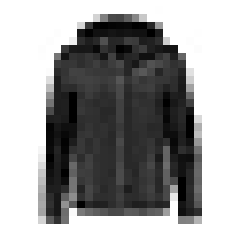

In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [7]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

With corresponding class names:

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [9]:
X_valid.shape

(5000, 28, 28)

In [10]:
X_test.shape

(10000, 28, 28)

Plot a sample of the images in the dataset:

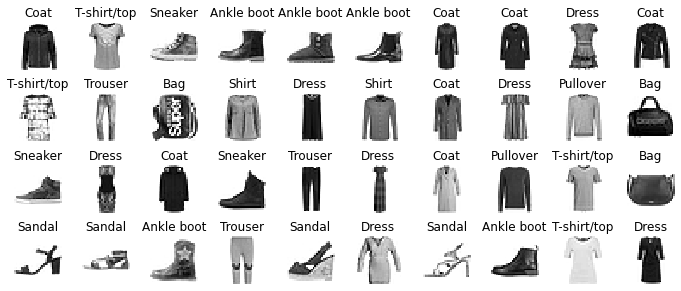

In [11]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### Building the model

Let's build a multi-layer perceptron (MLP) with two hidden layers:

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Setting up the sequential model consists of the following steps.

1. Set up a sequential model and then we will sequentially add layers to it.
2. Flatten the 28x28 pixel image into a 1D vector.  Since it is the first layer, should specify input shape.
3. Add a fully connected dense layer with 300 neurons, including a ReLU activation function.
4. Add another fully connected dense layer with 100 neurons, including a ReLU.
5. Add a final dense layer with 10 neurons so we have one per output class, and include a softmax activation function convert to class probabilities.

Alternatively, the sequential model may be specificed by a list of layers.

In [13]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

Can get a summary of the model using the `summary` method.

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Can extract list of layers from `model.layers`.

In [15]:
model.layers

### Compiling the model

Once the model is created we still need to specify the loss function and the optimizer to use to train the model.  This is set by *compiling* the model.

In [16]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Since we have a classification problem we will use a categorical cross-entropy loss, with a stochastic gradient descent optimiser.

We will also specify an extra metric to compute during training and evlaution, in this case the accuracy.

You can find further details regarding Kera loss functions, optimisers and metric in the Keras API.
- [Keras loss functions](https://keras.io/api/losses/)
- [Keras optimisers](https://keras.io/api/optimizers/)
- [Keras metrics](https://keras.io/api/metrics/)

### Fitting the model

Call `model.fit` to fit the model, given training and validation data and number of epochs.

The loss and extra metrics will be evaluated on the validation data at the end of each epoch.

In [17]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.9749 - accuracy: 0.6907 - val_loss: 0.5293 - val_accuracy: 0.8202
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5049 - accuracy: 0.8238 - val_loss: 0.4413 - val_accuracy: 0.8482
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4429 - accuracy: 0.8450 - val_loss: 0.4244 - val_accuracy: 0.8560
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4208 - accuracy: 0.8525 - val_loss: 0.4168 - val_accuracy: 0.8566
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4014 - accuracy: 0.8586 - val_loss: 0.3847 - val_accuracy: 0.8656
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3847 - accuracy: 0.8651 - val_loss: 0.3668 - val_accuracy: 0.8734
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3726 - accuracy: 0.8700 - val_loss: 0.3692 - val_accuracy:

### Model history

The fit method returns the model history, which contains the training parameters (`history.parms`) and a dictionary containing the loss and additional metrics computed during training (`history.history`).

In [18]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 1719}

In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Let's plot the history.

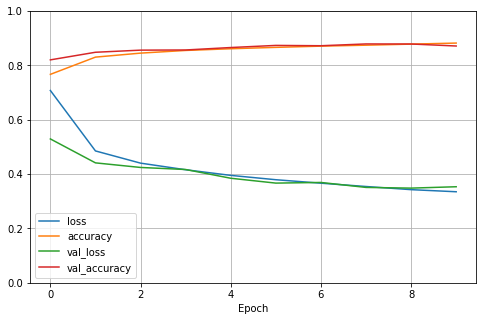

In [20]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.xlabel("Epoch")
plt.show()

Note that the validation error is compute at the end of each epoch, whereas the training error is computed using a running mean during each epoch.

### Evaluating on the test set

We can evaluate the model on the test set using `model.evaluate`.

In [21]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3911 - accuracy: 0.8590


[0.3910517990589142, 0.859000027179718]

### Predictions

We can make predictions on new data using `model.predict`.

Consider the first three images in the test set.

In [22]:
X_new = X_test[:3]

Estimating class probabilities:

In [23]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.11, 0.  , 0.84],
       [0.  , 0.  , 0.92, 0.  , 0.01, 0.  , 0.08, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

Making class predictions:

In [24]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [25]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

Check with test set targets:

In [26]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Let's view the images considered for prediction.

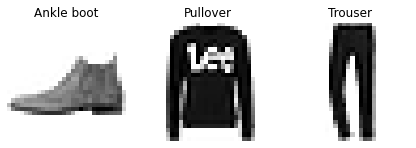

In [27]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

**Exercises:** *You can now complete Exercise 1 in the exercises associated with this lecture.*

## Functional API

While the *Sequential API* is very easy to use and many models are sequential in nature, it is also somewhat limited. 

The *Functional API* allows more complex models to be built.

For example, a Wide & Deep neural network (see [paper](https://ai.google/research/pubs/pub45413)) connects all or part of the inputs directly to the output layer.

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture12_Images/wide_deep_architecture.png" style="height: 300px;"/>

[Credit: Geron]

### Loading data

We will illustrate the use of the Functional API to build this model, using the California housing dataset as a regression problem.

In [28]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

The dataset contains 8 features (displayed below) contained in `housing.data` that can be used to predict house prices (in units of $100,000), which are contained in `housing.targets`.

In [29]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

Split the data into training, validation and test sets.

In [30]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

Scale features to standardise.

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

### Building the model

In [32]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

Setting up the functional model consists of the following steps.

1. Set up the input of the model.
2. Create a dense layer with 30 neurons that takes `_input` as the input, and includes a ReLU activation function.
3. Create a dense layer with 30 neurons that takes the output of the previous layer as an input, and includes a ReLU activation function.
4. Concatenate the input and the output of the second hidden layer.
5. Create a dense layer that takes the concatenated data as an input and outputs a single value (for the regression model).
6. Build the model specifying the inputs and outputs (of which there can be multiple).

Note that each component is called like a function, mapping inputs to outputs, hence the name of the *Functional API*.

In [33]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 30)           930         dense_6[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_7[0][0]                

### Compiling the model

Once the model is created we again need to *compile* the mode to specify the loss function and the optimizer to use to train the model.  

In [34]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))

### Fitting the model

Again we fit the model, given training and validation data and number of epochs, and compute the loss on the validation data at the end of each epoch.

In [35]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 3.3877 - val_loss: 1.3662
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6701 - val_loss: 0.6140
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5878 - val_loss: 0.6010
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5613 - val_loss: 0.7223
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5221 - val_loss: 0.6477
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5079 - val_loss: 0.5422
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4776 - val_loss: 0.4726
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4736 - val_loss: 0.4346
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4563 - val_loss: 0.4483
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4491 - val_loss: 0.4356

### Evaluating on the test set

We evaluate the model on the test set as before.

In [36]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 614us/step - loss: 0.3946


### Predictions

We again make predictions on new data (the first three instances of the test set) using `model.predict`.

In [37]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

array([[0.5393344],
       [1.7845619],
       [3.7073162]], dtype=float32)

## Subclassing API

Both the *Sequential API* and the *Functional API* support static models: they involving defining a model and then feeding it data for training or inference.

The *Subclassing API* allows you to subclass Keras models (and other objects such as layers).  This support dynamic models and allows you to construct alternative model objects that can be widely used elsewhere.

### Building the model

Let's use the *Subclassing API* to build a Wide & Deep neural network with two inputs and outputs as an example

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture12_Images/wide_deep_architecture_multiple_io.png" style="height: 300px;"/>

[Credit: Geron]

Firstly, let's spit our data so we have two sets of inputs.

In [38]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

A model class can then be written to implement the model, inheriting from `keras.models.Model`.

In [39]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

The model must have `__init__` and `call` methods.  Within `__init__` you need to instantiate the layers that you need, before you make use of them within `call`.

Since the `call` method is implemented directly, there is a great deal of flexibility to implement complex models.

The model can then be used like other Keras model and you can compile and fit it as usual.

Note that for bespoke models implemented this way, Keras cannot easily inspect it.  Thus, it is not so straightforward, e.g., to save the model or to perform type and shape checking.  

### Compiling the model

In [40]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

### Fitting the model

In [41]:
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))

Epoch 1/10
363/363 [==============================] - 2s 2ms/step - loss: 4.2083 - output_1_loss: 3.9683 - output_2_loss: 6.3689 - val_loss: 4.4971 - val_output_1_loss: 4.4396 - val_output_2_loss: 5.0145
Epoch 2/10
363/363 [==============================] - 1s 1ms/step - loss: 1.3817 - output_1_loss: 1.0538 - output_2_loss: 4.3331 - val_loss: 1.4687 - val_output_1_loss: 1.1156 - val_output_2_loss: 4.6471
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.9101 - output_1_loss: 0.6920 - output_2_loss: 2.8725 - val_loss: 1.0154 - val_output_1_loss: 0.6238 - val_output_2_loss: 4.5401
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7844 - output_1_loss: 0.6310 - output_2_loss: 2.1659 - val_loss: 0.9798 - val_output_1_loss: 0.5919 - val_output_2_loss: 4.4714
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6847 - output_1_loss: 0.5714 - output_2_loss: 1.7047 - val_loss: 0.9393 - val_output_1_loss: 0.5693 - val_ou

### Evaluating and making predictions

In [42]:
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

162/162 [==============================] - 0s 919us/step - loss: 0.5274 - output_1_loss: 0.4597 - output_2_loss: 1.1370


## Saving and restoring models

Keras can be used to easily save and restore models when using the *Sequential API* of the *Functional API*.

Models can of course be saved and restored when using the *Subclassing API* but it is necessary to use underlying TensorFlow methods and is not quite so striaghtforward (not covered further here).

Let's build and train a simple model and then save and restore it.

In [43]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [44]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.5543 - val_loss: 1.5038
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.9026 - val_loss: 0.8033
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6713 - val_loss: 0.7142
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6265 - val_loss: 0.6120
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5687 - val_loss: 0.5445
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5401 - val_loss: 0.5231
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5146 - val_loss: 0.4852
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4834 - val_loss: 0.4504
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4807 - val_loss: 0.4275
Epoch 10/10
162/162 [==============================] - 0s 807us/step - loss: 0.4328


### Saving

Saving the model is simply one line.

In [45]:
model.save("my_keras_model.h5")

The model is then saved using the HDF5 format.

The model's achitecture, values of the model parameters, the optimiser, hyperparameters, and state are all saved.

### Restoring

Restoring the model is also just one line.

In [46]:
model = keras.models.load_model("my_keras_model.h5")

The model can then be used as usual, e.g. to make predictions.

In [47]:
model.predict(X_new)

array([[0.75934905],
       [1.6126735 ],
       [3.0113294 ]], dtype=float32)

### Checkpointing

Since training may take a long time, you might like to save the model weights as training progresses so that you do not loss the results if the machine crashes or disconnects.

Model weights can also be saved and loaded in a single line.

In [48]:
model.save_weights("my_keras_weights.ckpt")

In [49]:
model.load_weights("my_keras_weights.ckpt")

## TensorBoard

TensorBoard is an interactive visualisation tool that you can use to review learning curves, analyse training statistics and inspect the architecture of your model.

### Logging

Let's log a training run and model and then view in TensorBoard.

In [50]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [51]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2021_02_12-12_37_04'

In [52]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [53]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

To log training as it progresses we need to set up `callback`.  

The `fit` methods allows a list of `callbacks` to be specified, which can then be called at the start and end of each epoch.

Let's set up two callbacks:
- One to checkpoint the model as we go, saving the best model considered so far, as evaluated on the validation set.
- One to log TensorBoard data.

In [54]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

The callbacks are then simply passed to the `fit` method.

In [55]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: 3.3697 - val_loss: 0.7126
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6964 - val_loss: 0.6880
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6167 - val_loss: 0.5803
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5846 - val_loss: 0.5166
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5321 - val_loss: 0.4895
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5083 - val_loss: 0.4951
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5044 - val_loss: 0.4861
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4813 - val_loss: 0.4554
Epoch 9/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4627 - val_loss: 0.4413
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4549 - val_loss: 0.4379

### Visualisation

TensorBoard then needs to be run to visualise the logs.  It simply runs in a browser.

TensorBoard can be launched from your terminal by:

```bash
tensorboard --logdir=./my_logs --port=6001
```

We can then launch TensorBoard in a browser at [localhost:6001](http://localhost:6001).

Let's switch to tensorboard to view the logs and inspect the computational graph of the model.